In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs
import bitstring

import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'co59-utf8.txt',
 'ETL4C',
 'ETL4INFO',
 'etl_4_inspect_data.ipynb']

In [3]:
t56s = '0123456789[#@:>? ABCDEFGHI&.](<  JKLMNOPQR-$*);\'|/STUVWXYZ ,%="!'

def T56(c):
    return t56s[c]

with codecs.open('co59-utf8.txt', 'r', 'utf-8') as co59f:
    co59t = co59f.read()
    
co59l = co59t.split()
CO59 = {}
for c in co59l:
    ch = c.split(':')
    co = ch[1].split(',')
    CO59[(int(co[0]), int(co[1]))] = ch[0]

In [4]:
file_list = [
    'ETL4C',
]

In [5]:
filename = file_list[0]
file_stream = bitstring.ConstBitStream(filename=filename)

In [6]:
RECORD_LENGTH = 2952
skip = 0
file_stream.pos = skip * RECORD_LENGTH

In [7]:
record = file_stream.readlist(','.join([
    '2*uint:36',
    'uint:8',
    'pad:28',
    'uint:8',
    'pad:28',
    '4*uint:6', # 4 Character Code - [4:8]
    'pad:12',
    '15*uint:36',
    'pad:1008',
    'bytes:21888', # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
]))

In [8]:
print(type(record), len(record))
for idx, v in enumerate(record[:-1]):
    print(f'{idx} - {v}')

<class 'list'> 24
0 - 500100
1 - 5001
2 - 177
3 - 129
4 - 24
5 - 16
6 - 16
7 - 17
8 - 0
9 - 0
10 - 1
11 - 0
12 - 1
13 - 23
14 - 9144
15 - 11
16 - 741202
17 - 741216
18 - 72
19 - 76
20 - 16
21 - 133
22 - 0


In [9]:
record_dict = {
    'character': ''.join(map(T56, record[4:8])), # 4 Character Code - [4:8]
    'image_data': record[23], # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
}

In [10]:
record_dict['character']

'H  A'

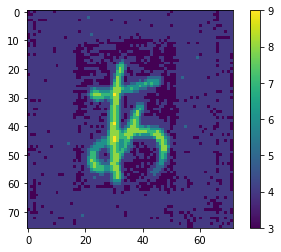

In [11]:
width = 72
height = 76
np_img = np.array(Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 4))

plt.imshow(np_img)
plt.colorbar()

In [12]:
def show_image(filename, pos=0):
    f = bitstring.ConstBitStream(filename=filename)
    f.bytepos = pos * 2952
    r = f.readlist('2*uint:36,uint:8,pad:28,uint:8,pad:28,4*uint:6,pad:12,15*uint:36,pad:1008,bytes:2736')
    print(''.join([t56s[c] for c in r[4:8]]))
    np_img = np.array(Image.frombytes('F', (r[18], r[19]), r[-1], 'bit', 4))
    plt.imshow(np_img)
    plt.colorbar()

In [13]:
idx = 500

H RI


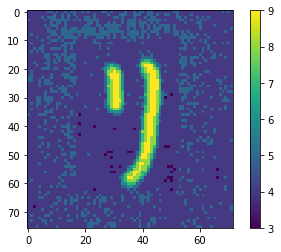

In [14]:
show_image(filename, pos=idx)
idx += 1

In [15]:
total_samples = 0
record_count = {}

for filename in file_list:
    file_stream = bitstring.ConstBitStream(filename=filename)
    while True:
        try:
            r = file_stream.readlist('2*uint:36,uint:8,pad:28,uint:8,pad:28,4*uint:6,pad:12,15*uint:36,pad:1008,bytes:2736')
        except:
            break
            
        total_samples += 1
        
        record_dict = {
            'character': ''.join([t56s[c] for c in r[4:8]]), # 4 Character Code - [4:8]
            'image_data': r[23], # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
        }

        name = record_dict['character']

        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

In [16]:
total_samples

6120

In [17]:
len(record_count.keys())

51

In [18]:
record_count

{'H  A': 120,
 'H  I': 120,
 'H  U': 120,
 'H  E': 120,
 'H  O': 120,
 'H KA': 120,
 'H KI': 120,
 'H KU': 120,
 'H KE': 120,
 'H KO': 120,
 'H SA': 120,
 'H SI': 120,
 'H SU': 120,
 'H SE': 120,
 'H SO': 120,
 'H TA': 120,
 'H TI': 120,
 'H TU': 120,
 'H TE': 120,
 'H TO': 120,
 'H NA': 120,
 'H NI': 120,
 'H NU': 120,
 'H NE': 120,
 'H NO': 120,
 'H HA': 120,
 'H HI': 120,
 'H HU': 120,
 'H HE': 120,
 'H HO': 120,
 'H MA': 120,
 'H MI': 120,
 'H MU': 120,
 'H ME': 120,
 'H MO': 120,
 'H YA': 120,
 'H YI': 120,
 'H YU': 120,
 'H YE': 120,
 'H YO': 120,
 'H RA': 120,
 'H RI': 120,
 'H RU': 120,
 'H RE': 120,
 'H RO': 120,
 'H WA': 120,
 'H WI': 120,
 'H WU': 120,
 'H WE': 120,
 'H WO': 120,
 'H  N': 120}